In [4]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13639 (delta 0), reused 2 (delta 0), pack-reused 13627
Receiving objects: 100% (13639/13639), 12.28 MiB | 13.36 MiB/s, done.
Resolving deltas: 100% (9297/9297), done.


In [5]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [6]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [7]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [12]:
!unzip "/content/darknet/data/obj2.zip"

Archive:  /content/darknet/obj2.zip
   creating: obj/
  inflating: obj/Beck's ice 330ml bottle - Copy.jpg  
  inflating: obj/Beck's ice 330ml bottle.txt  
  inflating: obj/Beck's ice 500ml can.jpg  
  inflating: obj/Beck's ice 500ml can.txt  
  inflating: obj/Budweiser 500ml can.jpg  
  inflating: obj/Budweiser 500ml can.txt  
  inflating: obj/Budweiser Magnum 500ml can.jpg  
  inflating: obj/Budweiser Magnum 500ml can.txt  
  inflating: obj/budweiser-beer-330ml.jpg  
  inflating: obj/budweiser-beer-330ml.txt  
  inflating: obj/budweiser-beer-650ml.jpg  
  inflating: obj/budweiser-beer-650ml.txt  
  inflating: obj/budweiser-magnum-beer-650ml.jpg  
  inflating: obj/budweiser-magnum-beer-650ml.txt  
  inflating: obj/corona-extra-330ml.jpg  
  inflating: obj/corona-extra-330ml.txt  
  inflating: obj/Foster's Gold 330ml.jpg  
  inflating: obj/Foster's Gold 330ml.txt  
  inflating: obj/Foster's Gold 650ml.jpg  
  inflating: obj/Foster's Gold 650ml.txt  
  inflating: obj/Foster's Lager 330ml

In [0]:
!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

!pip install -q pycocotools   

In [108]:
fileId = '1jk4-tT-p8nHlPoY2zjL_99cFtbykY0ge'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
#fileName = fileId
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

Extracted zip file 1jk4-tT-p8nHlPoY2zjL_99cFtbykY0ge.zip


In [109]:
!ls 

3rdparty		 DarknetConfig.cmake.in  net_cam_v3.sh
backup			 darknet.py		 obj
bad.list		 darknet_video.py	 obj2.zip
build			 data			 predictions.jpg
build.ps1		 delete2.jpg		 README.md
build.sh		 delete.jpg		 results
cfg			 generate_train.py	 scripts
chart.png		 image_yolov2.sh	 src
chart_yolov3_custom.png  image_yolov3.sh	 video_v2.sh
cmake			 include		 video_yolov3.sh
CMakeLists.txt		 json_mjpeg_streams.sh	 yolov3.weights
darknet			 LICENSE
darknet53.conv.74	 Makefile


In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [111]:
%cd /content/darknet

/content/darknet


In [112]:
pwd

'/content/darknet'

In [46]:
%cd /content/darknet/
!python generate_train.py

/content/darknet


In [47]:
pwd

'/content/darknet'

In [31]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj2			   person.jpg


In [1]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-06-07 15:22:48--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-06-07 15:22:48--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   243KB/s    in 7m 39s  

2020-06-07 15:30:30 (345 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [48]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg yolov3.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
backup: Using default '/backup/'
yolov3_custom
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

In [0]:
pwd

'/content/darknet'

In [79]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.111591, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 34.704109, iou_loss = 0.000000, total_loss = 34.704109 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.047598, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 26.913363, iou_loss = 0.000000, total_loss = 26.913363 
 total_bbox = 1164, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.214408, GIOU: 0.117353), Class: 0.615268, Obj: 0.178640, No Obj: 0.196695, .5R: 0.000000, .75R: 0.000000, count: 4, class_loss = 31.178879, iou_loss = 2.500965, total_loss = 33.679844 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No 

In [95]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 6753: 0.074279, 0.064312 avg loss, 0.001000 rate, 0.559874 seconds, 54024 images, 6.579670 hours left
Loaded: 0.000056 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.862783, GIOU: 0.860062), Class: 0.989396, Obj: 0.996608, No Obj: 0.002528, .5R: 1.000000, .75R: 1.000000, count: 2, class_loss = 0.000145, iou_loss = 0.031971, total_loss = 0.032116 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 47466, rewritten_bbox = 0.000000 % 
v3 (mse 

In [118]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=8/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=2/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights Slide2.jpg 

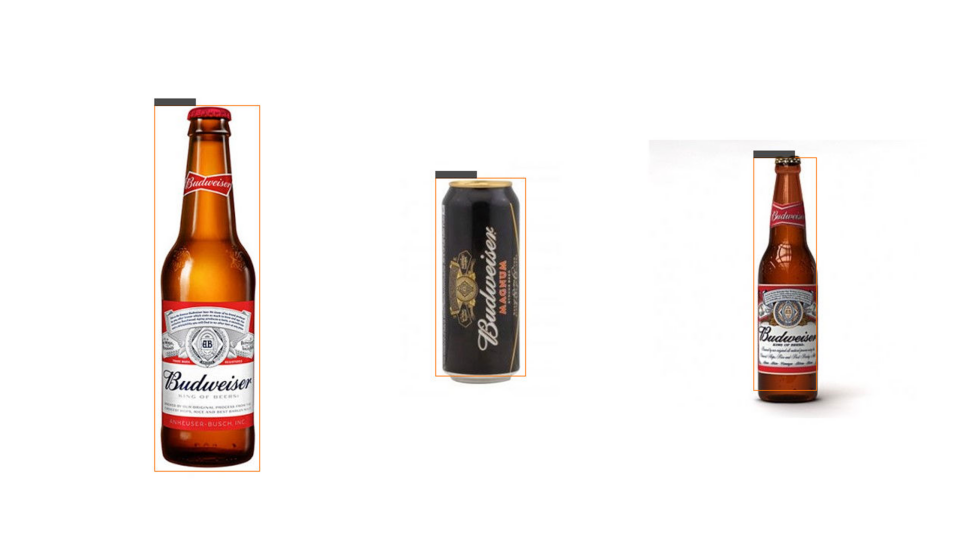

In [129]:
imShow('predictions.jpg')

In [0]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_7000.weights delete.jpg -thresh 0.35

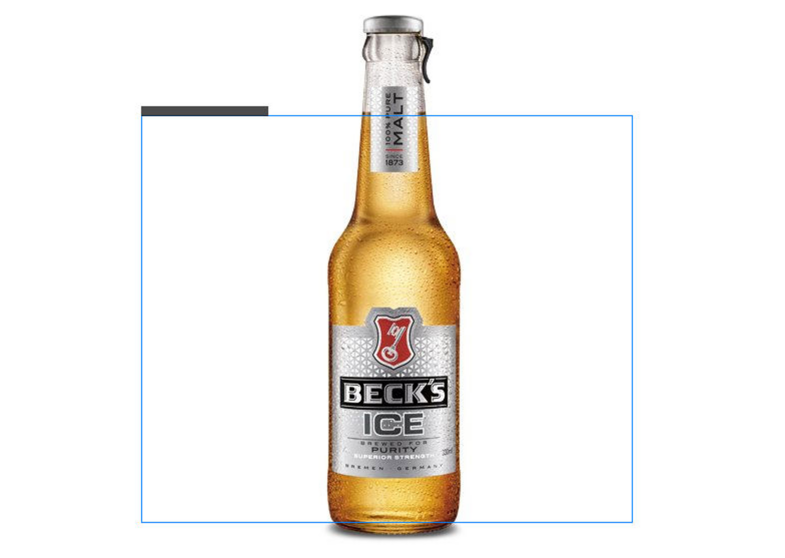

In [142]:
imShow('predictions.jpg')

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights delete2.jpg 

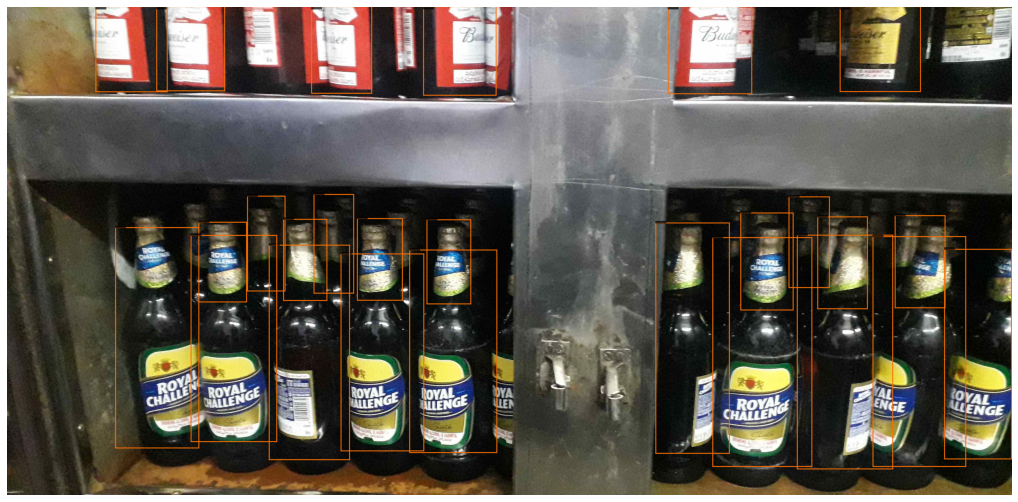

In [117]:
imShow('predictions.jpg')